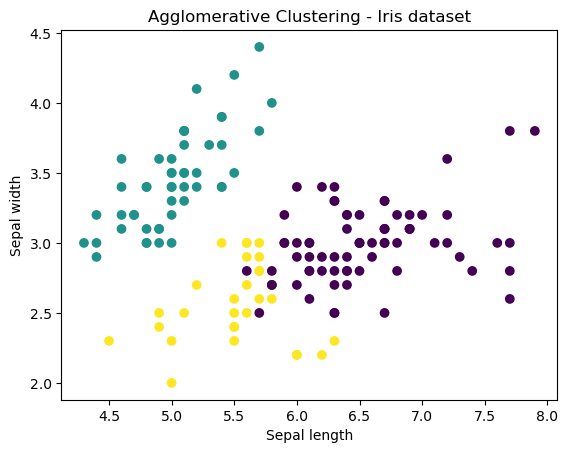

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering - Iris dataset')
plt.show()

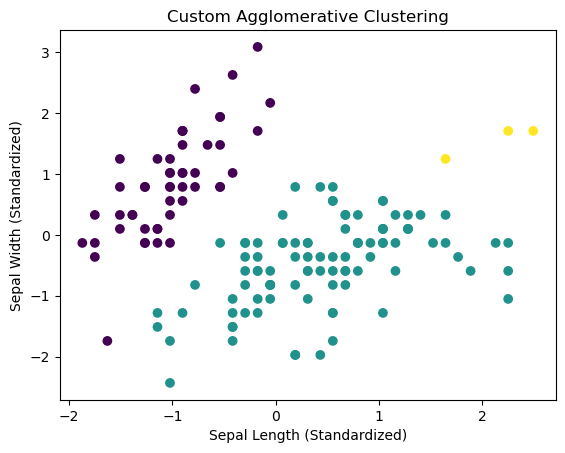

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Function to compute Euclidean Distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist, idx1, idx2 = dist_matrix[i, j], i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg = agglomerative_clustering(X_std, n_clusters=3)

# Visualize the clustering result of custom function
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg, cmap='viridis')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()

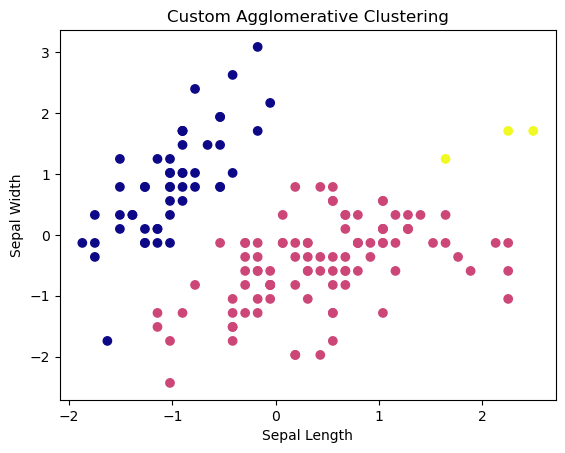

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

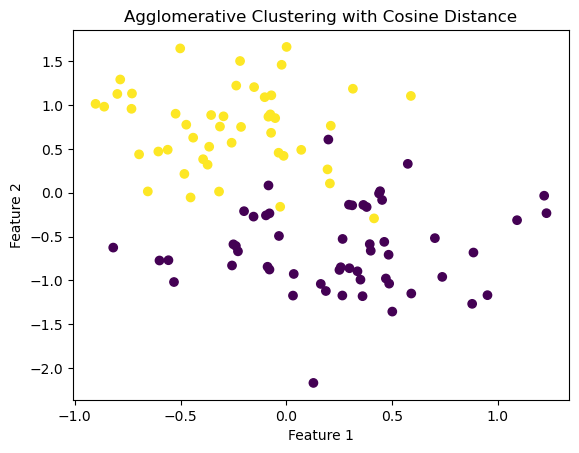

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset
sample_data = make_blobs(n_samples=100, centers=2, n_features=3, cluster_std=0.5, center_box=(-0.8, 0.8), random_state=42)[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

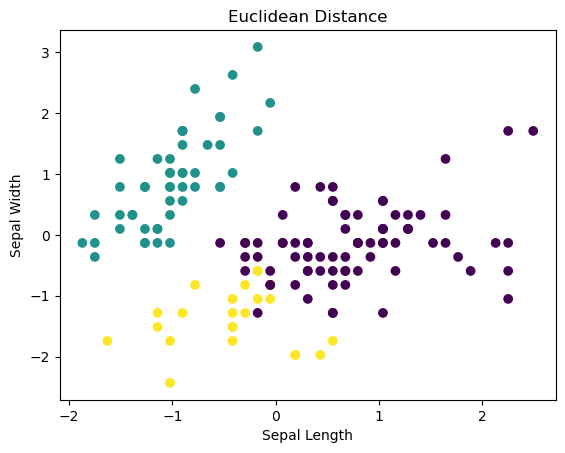

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

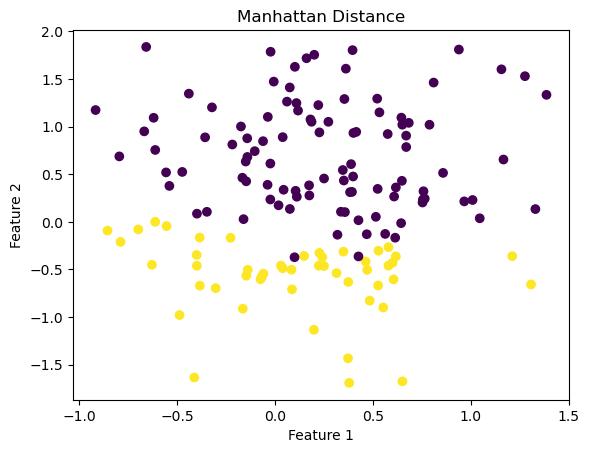

In [6]:
# Exercise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(point1 - point2))

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset with 3 close clusters and center_box parameter
sample_data = make_blobs(n_samples=150, centers=2, n_features=3, cluster_std=0.5, random_state=0, center_box=(-2, 2))[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

# Plot the results
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Manhattan Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



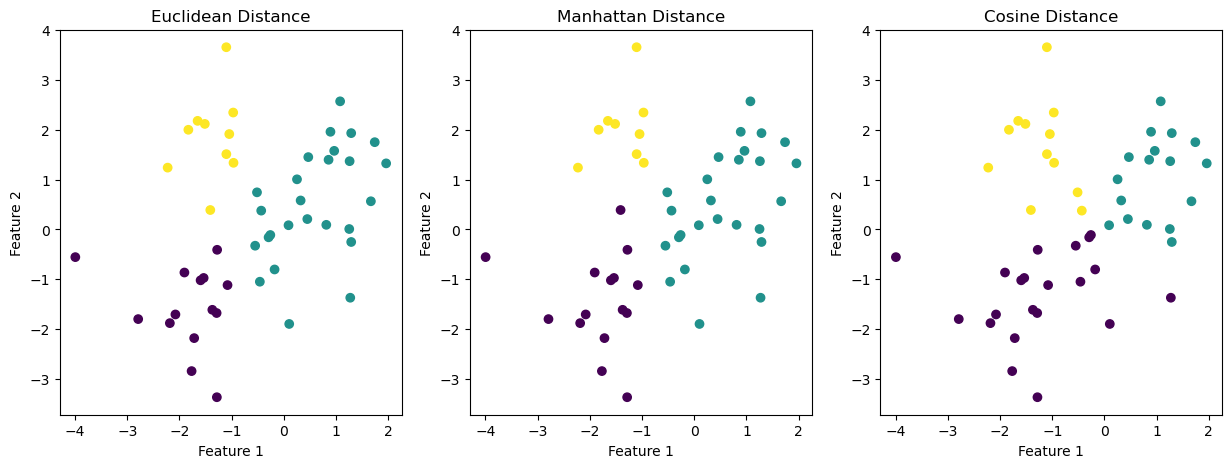

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the sample data
X, _ = make_blobs(n_samples=50, centers=3, n_features=2, center_box=(-2, 2), random_state=42)

# Perform Agglomerative Clustering with Sklearn
n_clusters = 3
# TODO: Create an instance of AgglomerativeClustering with the 'euclidean' metric and set linkage to 'average'
cluster_euc = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean',linkage='average')
# TODO: Create an instance of AgglomerativeClustering with the 'manhattan' metric and set linkage to 'average'
cluster_man = AgglomerativeClustering(n_clusters=n_clusters,metric='manhattan',linkage='average')
# TODO: Create an instance of AgglomerativeClustering with the 'cosine' metric and set linkage to 'average'
cluster_cos = AgglomerativeClustering(n_clusters=n_clusters,metric='cosine',linkage='average')
# TODO: Calculate the cluster labels for each distance metric
labels_euc = cluster_euc.fit_predict(X)
labels_man = cluster_man.fit_predict(X)
labels_cos = cluster_cos.fit_predict(X)
# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[2].scatter(X[:, 0], X[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()